In [1]:
%pip install numpy scipy scikit-learn pandas joblib pytorch deap update_checker tqdm stopit xgboost 
%pip install dask[delayed] dask[dataframe] dask-ml 
%pip install scikit-mdr skrebate
%pip install tpot
%pip install seaborn matplotlib

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pytorch (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/home/cak/Documents/Coolyeah/General/ML/TPOT-Assignment/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/home/cak/Documents/Coolyeah/General/ML/TPOT-Assignment/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/home/cak/Documents/Coolyeah/General/ML/TPOT-Assign

In [2]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff('dataset')

# Convert it into a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


# Data Exploration

In [3]:
# Check for any null values in the filtered dataset
null_data = df.isnull().sum()
null_data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

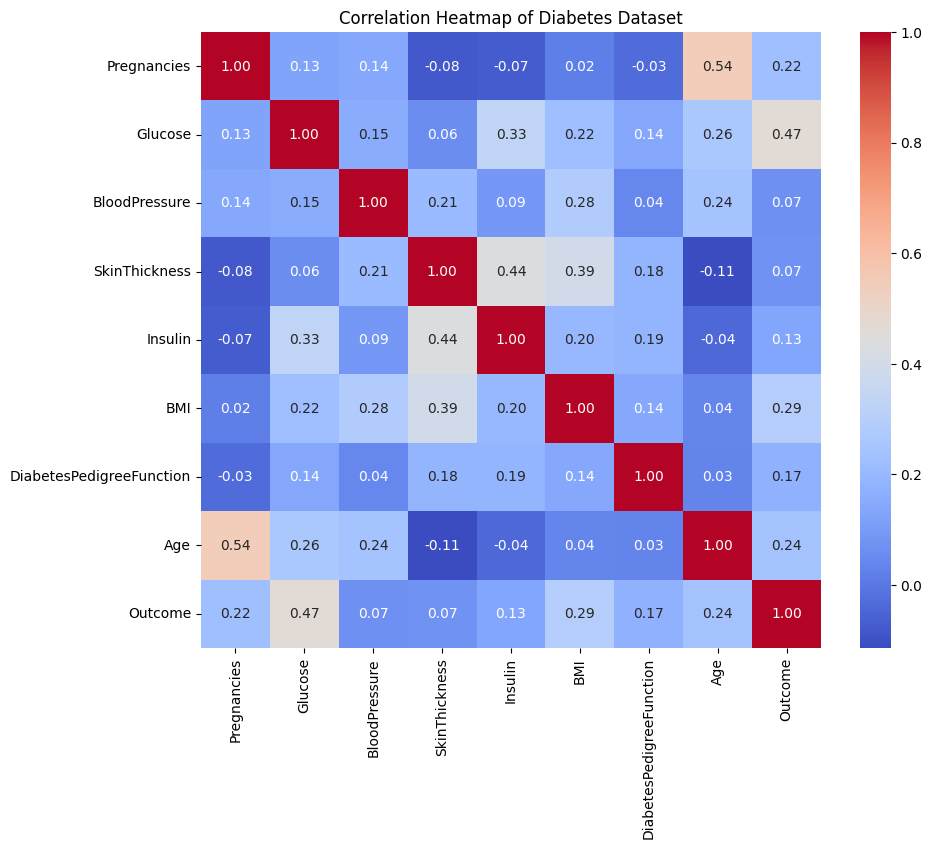

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [5]:
# Extract the correlation values against 'Outcome'
outcome_corr = df.corr()['Outcome'].sort_values()

# Display the correlation values
outcome_corr

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
# Drop columns with correlation less than 0.15 against 'Outcome'
filtered_df = df.drop(outcome_corr[outcome_corr < 0.15].index, axis=1)

# Show the new dataframe information
filtered_df.info(), filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    float64
 5   Outcome                   768 non-null    float64
dtypes: float64(6)
memory usage: 36.1 KB


(None,
    Pregnancies  Glucose   BMI  DiabetesPedigreeFunction   Age  Outcome
 0          6.0    148.0  33.6                     0.627  50.0      1.0
 1          1.0     85.0  26.6                     0.351  31.0      0.0
 2          8.0    183.0  23.3                     0.672  32.0      1.0
 3          1.0     89.0  28.1                     0.167  21.0      0.0
 4          0.0    137.0  43.1                     2.288  33.0      1.0)

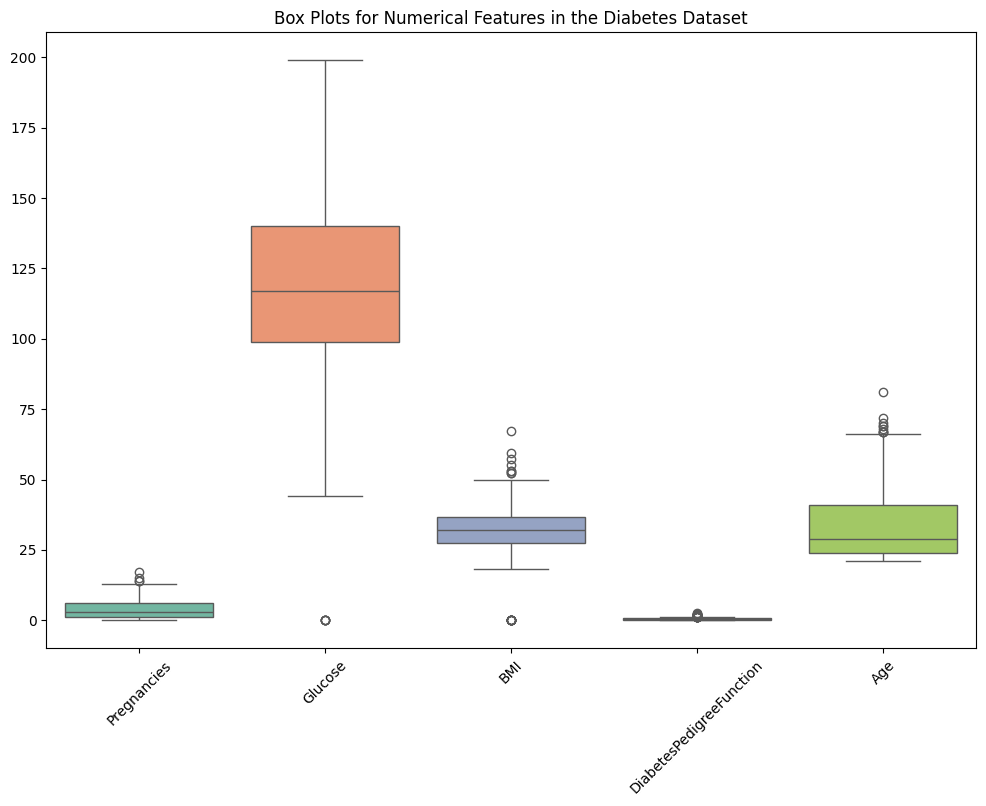

In [7]:
# Create box plots for each feature to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df.drop(columns=["Outcome"]), palette="Set2")
plt.title('Box Plots for Numerical Features in the Diabetes Dataset')
plt.xticks(rotation=45)  # Rotating the x labels for better visibility
plt.show()

In [8]:
# Perform IQR capping on the previously filtered columns
Q1 = filtered_df.quantile(0.25)
Q3 = filtered_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
capped_df = filtered_df.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], x), axis=0)
capped_df = capped_df.apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name], x), axis=0)

# Provide basic descriptive statistics to compare the effect
capped_df.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,50.550000,1.200000,66.500000,1.000000


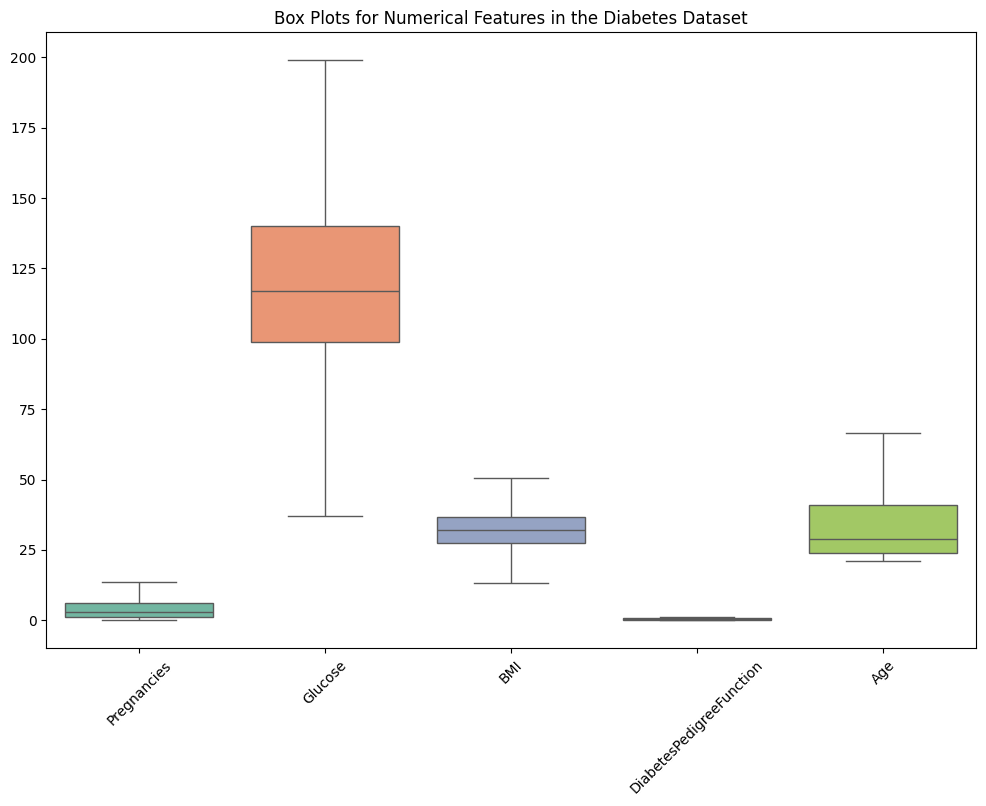

In [10]:
# Create box plots for each feature to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=capped_df.drop(columns=["Outcome"]), palette="Set2")
plt.title('Box Plots for Numerical Features in the Diabetes Dataset')
plt.xticks(rotation=45)  # Rotating the x labels for better visibility
plt.show()